<a href="https://colab.research.google.com/github/planetgitn/-Hotel-Booking-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project_ANAND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading csv file
df=pd.read_csv('/content/Hotel Bookings.csv')

In [4]:
# Checking first 10 rows in dataset
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0.0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0.0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0.0,No Deposit,NaN,NaN,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0.0,No Deposit,303.0,NaN,0.0,Transient,103.0,0.0,1.0,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0.0,No Deposit,15.0,NaN,0.0,Transient,105.5,0.0,0.0,Canceled,2015-04-22


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
43912,City Hotel,1,35,2015,September,39,25,2,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0.0,Non Refund,1.0,NaN,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43913,City Hotel,1,87,2015,September,39,25,2,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0.0,Non Refund,1.0,NaN,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43914,City Hotel,1,87,2015,September,39,25,2,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0.0,Non Refund,1.0,NaN,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43915,City Hotel,1,87,2015,September,39,25,2,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0.0,Non Refund,1.0,NaN,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43916,City Hotel,1,87,2015,September,39,25,2,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking basic information of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43917 entries, 0 to 43916
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43917 non-null  object 
 1   is_canceled                     43917 non-null  int64  
 2   lead_time                       43917 non-null  int64  
 3   arrival_date_year               43917 non-null  int64  
 4   arrival_date_month              43917 non-null  object 
 5   arrival_date_week_number        43917 non-null  int64  
 6   arrival_date_day_of_month       43917 non-null  int64  
 7   stays_in_weekend_nights         43917 non-null  int64  
 8   stays_in_week_nights            43917 non-null  int64  
 9   adults                          43917 non-null  int64  
 10  children                        43913 non-null  float64
 11  babies                          43917 non-null  int64  
 12  meal                            

In [7]:
# Exploring descriptive statistical parameter

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,43917.000000,43917.000000,43917.000000,43917.000000,43917.000000,43917.000000,43917.000000,43917.000000,43913.000000,43917.000000,43917.000000,43917.000000,43917.000000,43916.000000,35277.000000,3281.000000,43916.000000,43916.000000,43916.000000,43916.000000
mean,0.280506,88.742150,2016.022952,27.816495,15.758066,1.157912,3.033882,1.864540,0.122629,0.013230,0.040485,0.092789,0.133593,0.277894,197.293676,231.193539,0.529238,94.375236,0.127357,0.601717
std,0.449252,94.683435,0.759415,13.581790,8.793940,1.133818,2.404765,0.678095,0.435978,0.116037,0.197097,1.275464,0.957842,0.715734,104.238657,130.153945,7.237934,59.608794,0.339065,0.809859
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,10.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,135.000000,0.000000,52.500000,0.000000,0.000000
50%,0.000000,54.000000,2016.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,76.670000,0.000000,0.000000
75%,1.000000,145.000000,2017.000000,38.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,308.000000,0.000000,121.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,20.000000,535.000000,543.000000,185.000000,508.000000,8.000000,5.000000


In [8]:
# checking the total number of null values in evry column

df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             464
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       1
deposit_type                          1
agent                              8640
company                           40636


In [ ]:
# Replacing all null values with their mean values for numerical columns and string columns with "Not present"

df["children"].fillna(df["children"].mean(),inplace = True)
df["country"].fillna("Not present",inplace = True)
df["agent"].fillna(df["agent"].mean(),inplace = True)
df["children"].fillna(df["children"].mean(),inplace = True)
df["company"].fillna(df["company"].mean(),inplace = True)

In [9]:
# Ensure that all the null values get raplace and there is no null values in any column
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             464
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       1
deposit_type                          1
agent                              8640
company                           40636


In [10]:
# Counting the total number of values in 'is_canceled' column
is_canceled_counts=df['is_canceled'].value_counts()
is_canceled_counts

0    31598
1    12319
Name: is_canceled, dtype: int64

Text(0, 0.5, 'Booking Cancelled (No = 0, Yes = 1)')

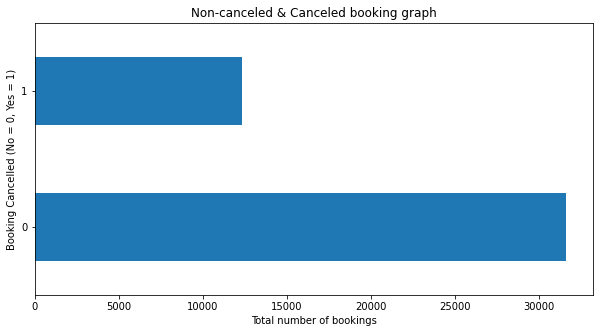

In [11]:
# plot the graph for total number of bookings vs canceled or non-canceled bookings
plt.rcParams['figure.figsize'] = (10, 5)
is_canceled_counts.plot(kind='barh')
plt.title('Non-canceled & Canceled booking graph')
plt.xlabel('Total number of bookings')
plt.ylabel('Booking Cancelled (No = 0, Yes = 1)')

### **With the help of this bar graph, we can conclude that 75000 of customers checked-in the hotel while 44000 of customers canceled their bookings.** 

In [12]:
# Finding the percentage of booking
booking_percentage= is_canceled_counts/is_canceled_counts.sum()*100
booking_percentage

0    71.949359
1    28.050641
Name: is_canceled, dtype: float64

Text(0.5, 0, 'Booking Cancelled (No = 0, Yes = 1)')

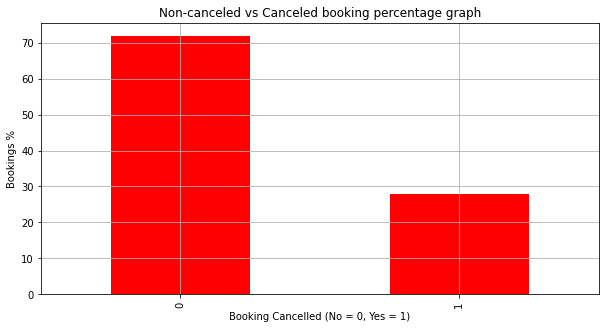

In [13]:
# Plot the graph for non-canceled vs canceled bookings percentage

booking_percentage.plot(kind='bar',color='red')
plt.grid()
plt.title('Non-canceled vs Canceled booking percentage graph')
plt.ylabel('Bookings %')
plt.xlabel('Booking Cancelled (No = 0, Yes = 1)')

### **From this graph, We got very meaningful insights that 37% of bookings got canceled  Where 63% of customers did checkd-in.**

In [14]:
# Calculate total number of bookings acorss different years 
year_counts=df['arrival_date_year'].value_counts().sort_index()
year_counts

2015    12171
2016    18567
2017    13179
Name: arrival_date_year, dtype: int64

Text(0.5, 0, 'Years')

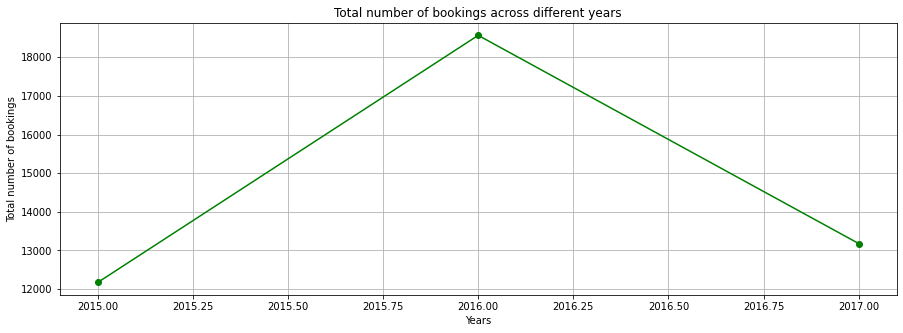

In [15]:
# Plot the graph for years vs total bookings
plt.rcParams['figure.figsize'] = (15, 5)
year_counts.plot(kind='line',color='green',marker='o')
plt.grid()
plt.title('Total number of bookings across different years')
plt.ylabel('Total number of bookings')
plt.xlabel('Years')

### This plot clearly represents that bookings in year 2016 was highest compared to other years which is near about more than 56500. In year 2017 bookings got fall down compared to last year i.e. 40600 but this value was still quite better than it was in 2015 only about 22000. 